In [6]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import cv2
import os
import sys
import glob
import urllib.request
import json


# Getting reconstructions

In [2]:
file = pd.read_csv("http://ladi.s3-us-west-2.amazonaws.com/Labels/ladi_images_metadata.csv")
file

,uuid,timestamp,gps_lat,gps_lon,gps_alt,file_size,width,height,s3_path,url
0,a13fb353cca1f5e8060f95c80deb0c49e9a21f91,2016-01-16 07:34:55,29.623744,-95.652153,26.0,3497125.0,4608.0,3456.0,s3://ladi/Images/FEMA_CAP/1012/20118/VIRB0002_...,https://ladi.s3-us-west-2.amazonaws.com/Images...
1,03e5da2bc5e32cd7d58a164eefce499e2f14e06f,2014-06-24 13:09:20,32.386939,-86.344467,489.0,3518243.0,4608.0,3456.0,s3://ladi/Images/FEMA_CAP/1012/20118/VIRB0820_...,https://ladi.s3-us-west-2.amazonaws.com/Images...
2,c97e83122e14ec5fa5cfa6e2c911e066d8a07f7c,2014-06-24 11:06:27,NaN,NaN,NaN,8006650.0,6000.0,4000.0,s3://ladi/Images/FEMA_CAP/1012/20118/_DSC0015_...,https://ladi.s3-us-west-2.amazonaws.com/Images...
3,c534eb158948b63508eab34a667bf495e129f455,2014-06-24 11:20:03,NaN,NaN,NaN,8821238.0,6000.0,4000.0,s3://ladi/Images/FEMA_CAP/1012/20118/_DSC0123_...,https://ladi.s3-us-west-2.amazonaws.com/Images...
4,1c702459e21e5a7e7fec5eefaab42f5e5124113a,2014-06-24 11:21:07,32.371777,-86.345887,459.0,8385536.0,6000.0,4000.0,s3://ladi/Images/FEMA_CAP/1012/20118/_DSC0126_...,https://ladi.s3-us-west-2.amazonaws.com/Images...
...,...,...,...,...,...,...,...,...,...,...
580746,95fabbdbbb494beab517b5fea25a4e430d8fbcef,2020-01-27 12:01:31,18.002950,-66.896370,101.8,3413576.0,4000.0,3000.0,s3://ladi/Images/FEMA_CAP/9173/616637/2020_012...,https://ladi.s3-us-west-2.amazonaws.com/Images...
580747,4b590e5634dae396db6c838844d7670e5ef9e7f6,2020-01-27 12:00:25,18.003440,-66.896118,101.8,3307879.0,4000.0,3000.0,s3://ladi/Images/FEMA_CAP/9173/616637/2020_012...,https://ladi.s3-us-west-2.amazonaws.com/Images...
580748,bb7f86f1e9ab1a1ab3ea9e13cda998ab6e1bbb6d,2020-01-27 12:02:25,18.003280,-66.895955,101.8,3989427.0,4000.0,3000.0,s3://ladi/Images/FEMA_CAP/9173/616637/2020_012...,https://ladi.s3-us-west-2.amazonaws.com/Images...
580749,c9e5c19cb7cccf181d11b707f1a47b80341710b6,2020-01-27 12:00:45,18.003355,-66.896256,101.8,3722615.0,4000.0,3000.0,s3://ladi/Images/FEMA_CAP/9173/616637/2020_012...,https://ladi.s3-us-west-2.amazonaws.com/Images...


In [6]:
file = pd.read_csv("http://ladi.s3-us-west-2.amazonaws.com/Labels/ladi_images_metadata.csv")
mass = file.loc[(file['gps_lat'] < 42.368520) & (file['gps_lat'] > 41.791453) & (file['gps_lon'] > -73.255974) &( file['gps_lon'] < - 69.998533)] 
mass
mass.to_csv('massachusetts.csv') 

In [14]:
for idx, url in enumerate(maas['url']):
    if idx<50:
        urllib.request.urlretrieve(url, 'mass/images/{}.jpg'.format(idx))


In [ ]:
# Take initial guess of intrinsic parameters through metadata
!opensfm extract_metadata mass/

# Detect features points 
!opensfm detect_features mass/

# Match feature points across images
!opensfm match_features mass/

# This creates "tracks" for the features. That is to say, if a feature in image 1 is matched with one in image 2,
# and in turn that one is matched with one in image 3, then it links the matches between 1 and 3. In this case, 
# it does not matter since we only have two images
!opensfm create_tracks mass/

# Calculates the essential matrix, the camera pose and the reconstructed feature points
!opensfm reconstruct mass/

# For visualization using Open3D
!opensfm export_ply mass/

2020-07-28 17:24:52,945 INFO: Extracting EXIF for 36.jpg
2020-07-28 17:24:53,038 INFO: Extracting EXIF for 43.jpg
2020-07-28 17:24:53,110 INFO: Extracting EXIF for 6.jpg
2020-07-28 17:24:53,239 INFO: Extracting EXIF for 49.jpg
2020-07-28 17:24:53,309 INFO: Extracting EXIF for 33.jpg
2020-07-28 17:24:53,384 INFO: Extracting EXIF for 26.jpg
2020-07-28 17:24:53,458 INFO: Extracting EXIF for 25.jpg
2020-07-28 17:24:53,536 INFO: Extracting EXIF for 8.jpg
2020-07-28 17:24:53,665 INFO: Extracting EXIF for 18.jpg
2020-07-28 17:24:53,739 INFO: Extracting EXIF for 34.jpg
2020-07-28 17:24:53,817 INFO: Extracting EXIF for 3.jpg
2020-07-28 17:24:53,931 INFO: Extracting EXIF for 38.jpg
2020-07-28 17:24:54,005 INFO: Extracting EXIF for 19.jpg
2020-07-28 17:24:54,081 INFO: Extracting EXIF for 29.jpg
2020-07-28 17:24:54,153 INFO: Extracting EXIF for 44.jpg
2020-07-28 17:24:54,225 INFO: Extracting EXIF for 24.jpg
2020-07-28 17:24:54,303 INFO: Extracting EXIF for 2.jpg
2020-07-28 17:24:54,429 INFO: Extra

In [8]:
!opensfm undistort mass/

!opensfm compute_depthmaps mass/

^C
ImportError: numpy.core.multiarray failed to import
Traceback (most recent call last):
  File "/opt/conda/bin/opensfm", line 10, in <module>
    from opensfm import commands
  File "/opt/conda/lib/python3.7/site-packages/opensfm/commands/__init__.py", line 2, in <module>
    from . import extract_metadata
  File "/opt/conda/lib/python3.7/site-packages/opensfm/commands/extract_metadata.py", line 5, in <module>
    from opensfm import dataset
  File "/opt/conda/lib/python3.7/site-packages/opensfm/dataset.py", line 9, in <module>
    import cv2
ImportError: numpy.core.multiarray failed to import


# Finding and mapping the bounding boxes for each image in the reconstruction(s)
## *This failed..*

In [3]:
# Origin of our reconstruction, as given by the reference_lla.json (made from the reconstruction)
with open("mass/reference_lla.json", "r") as f:
    reference_lla = json.load(f)
    latitude=reference_lla["latitude"]
    longitude=reference_lla["longitude"]
    altitude=reference_lla["altitude"]

# This is the json file that contains the reconstructed feature points
with open("mass/reconstruction.json", "r") as f:
    reconstructions = json.load(f)

In [4]:
try:
    from pymap3d import enu2geodetic
except:
    !pip install pymap3d
    from pymap3d import enu2geodetic
from opensfm.features import denormalized_image_coordinates

# reading the csv
tracks = pd.read_csv("mass/tracks.csv", sep="\t", skiprows=1, names=["image_name", "track_id", "feature_id", "x", "y", "s", "R", "G", "B"])

# we need to denormalize the coordinates to turn them into regular pixel coordinates
normalized_coor = tracks[["x", "y", "s"]]
denormalized_coor = denormalized_image_coordinates(normalized_coor.values, 4496, 3000)

# create a new column with the denormalized coordinates
tracks["denorm_x"] = denormalized_coor[:, 0]
tracks["denorm_y"] = denormalized_coor[:, 1]

Processing /home/jovyan/.cache/pip/wheels/0c/24/19/30c440838faa979cd09d8ac37ae866669b980bfdaed4d0fb91/pymap3d-2.4.1-py3-none-any.whl


In [5]:
from shapely.geometry import Polygon
import geopandas as gpd

img_name_list = []
poly_list = []

for reconst in reconstructions:
    for shot in reconst["shots"]:
        # some housekeeping
        shot_name = shot.split(".")[0]
        img = cv2.imread("mass/images/"+shot) 
        h,w,_ = img.shape
        
        # here we get the features from the image and their corresponding reconstructed features
        reconst_ids = list(map(int, reconst["points"].keys()))
        tracks_shot = tracks[(tracks["image_name"] == shot) & (tracks["track_id"].isin(reconst_ids))]
        
        normalized_coor = tracks_shot[["x", "y", "s"]]
        denormalized_coor = denormalized_image_coordinates(normalized_coor.values, w, h)
        
        tracks_shot["denorm_x"] = denormalized_coor[:, 0]
        tracks_shot["denorm_y"] = denormalized_coor[:, 1]
        
        denorm_shot = np.round(tracks_shot[["denorm_x", "denorm_y"]].values)
        reconst_shot = np.array([reconst["points"][str(point)]["coordinates"] for point in tracks_shot["track_id"]])
        
        # transformation for the new orthorectified image
        H, inliers = cv2.findHomography(denorm_shot, reconst_shot[:, :2],cv2.RANSAC,5.0)
        
        
        pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
        dst = cv2.perspectiveTransform(pts,H).reshape(4, 2)
                
        geo_shot = np.array([enu2geodetic(dst[i, 0],dst[i, 1],0,latitude,longitude,altitude) for i in range(dst.shape[0])])  
        
        poly_points_list = geo_shot[:, :2].tolist()
        poly_points_tuples = tuple(map(tuple, poly_points_list))
        print(poly_points_tuples)
        
        img_name_list.append(shot_name)
        poly_list.append(Polygon(poly_points))

# cols_dict = {'image_name':img_name_list, 'geometry':poly_list}
used_images = gpd.GeoDataFrame({'image_name':img_name_list, 'geometry':poly_list}, crs='EPSG:4326')
used_images

((42.056900885575324, -70.73361246258916), (42.07864272332257, -70.63469323029294), (42.082446791232115, -70.63534014559883), (42.09770862605715, -70.72050669106746))


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


NameError: name 'poly_points' is not defined

HTTPError: Tile URL resulted in a 404 error. Double-check your tile url:
https://stamen-tiles-a.a.ssl.fastly.net/terrain/16/40429/51202.png

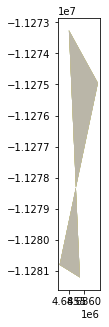

In [35]:
import contextily as ctx

ax = used_images.to_crs(epsg=3857).plot(figsize=(10,5), alpha=0.6, cmap='Set2')
ctx.add_basemap(ax)

In [17]:
import open3d as o3d
from open3d import JVisualizer

pcd = o3d.io.read_point_cloud("mass/reconstruction.ply")
visualizer = JVisualizer()
visualizer.add_geometry(pcd)
visualizer.show()

JVisualizer with 1 geometries

# DEM stuff

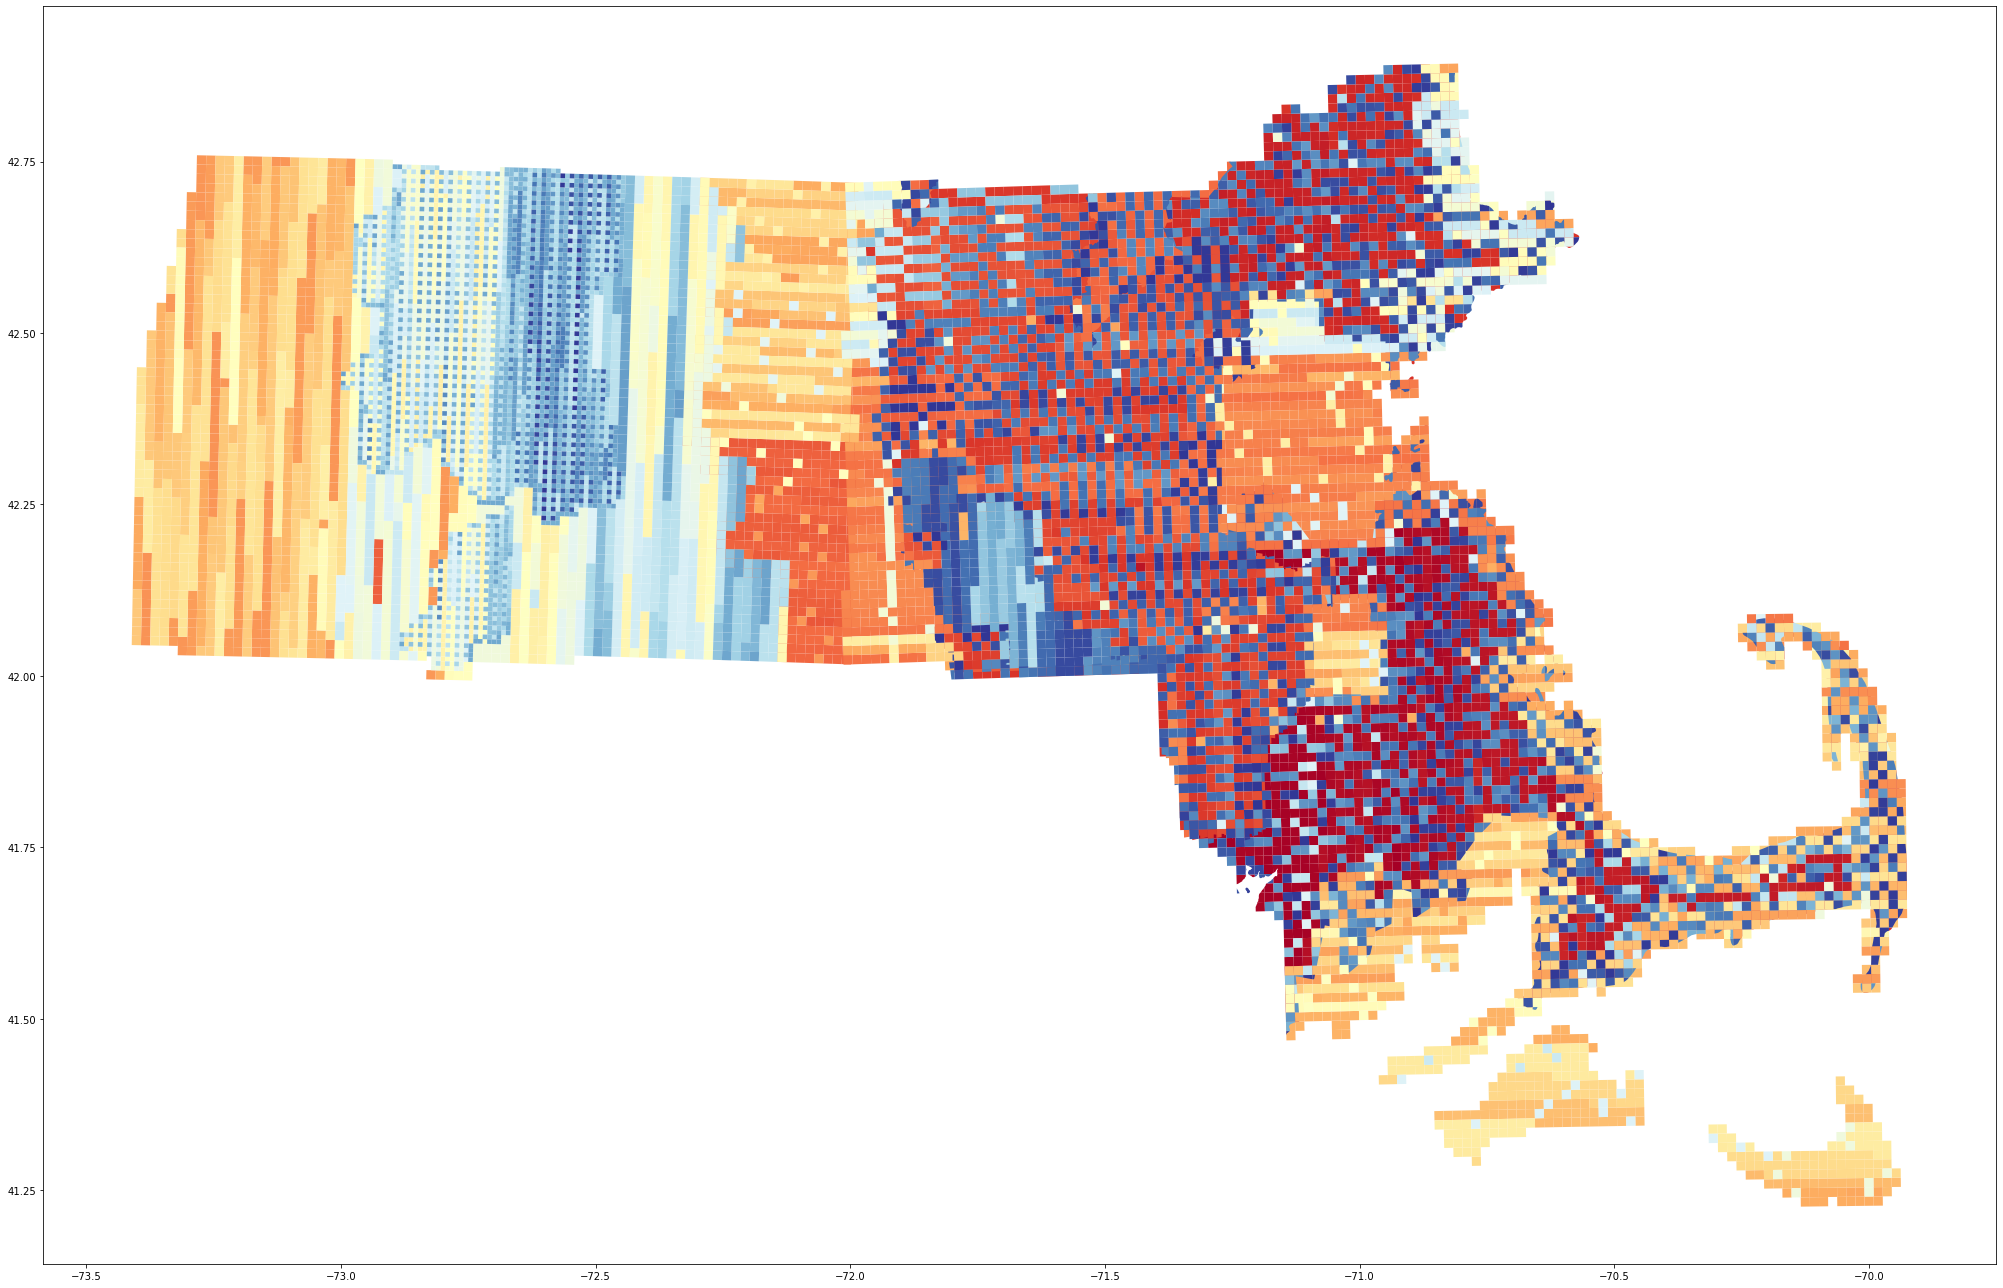

In [22]:
filepath = gpd.read_file('LIDAR Index (Most Current)/GISDATA_LIDARINDEX_POLY_CURRENTPolygon.shp')
filepath.plot(figsize=(20,15), cmap='RdYlBu')
